# Tkinter: le widget `Canvas` - zone de dessins

[Vidéo d'accompagnement](https://vimeo.com/500965709): la mettre sur pause pour chercher le plus possible par soi-même!

**Objectifs**:
- Comprendre le fonctionnement du widget `Canvas`
- Re-construire le jeu *space-invaders* (l'un des tous premiers!)

<img src="http://s3.amazonaws.com/digitaltrends-uploads-prod/2014/07/space-invaders.jpg"/>

**Cahier des charges**:
- les envahisseurs se rapprochent dangereusement (en accélérant) de la terre tout en envoyant des missiles,
- de temps à autre, un vaisseau mère parcours le haut de l'écran de gauche à droite,
- une ligne de boucliers (passifs) protège le «char» du héro, mais ils sont progressivement détruis par les missiles qu'ils reçoivent.
- le joueur déplace le vaisseau avec les flèches gauche et droite, il tire en appuyant sur la barre espace.
- ...

**IMPORTANT**: Créer un dossier `space_invaders` qui contiendra les différents fichiers du jeu. Si vous utilisez PyCharm, c'est le nom de votre projet (le dossier est créer automatiquement)

## Objectif 1: un simple rectangle qui se déplace de gauche à droite

### Interface graphique basique pour la scene

Le widget [Canvas](http://tkinter.fdex.eu/doc/caw.html#Canvas.create_rectangle) correspond à une zone rectangulaire sur laquelle il est possible de dessiner.

Ce widget possède entre autre les options `width` (largeur), `height` (hauteur), `bg` (couleur de fond)

<p style="text-align: center">
    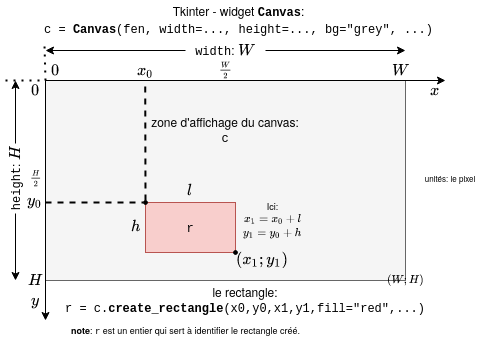
</p>

**AVANT DE COMMENCER**:
1. Crée un dossier `space_invaders` (ou un projet de même nom avec pycharm...) pour gérer les multiples fichiers de ce projet,
2. Observe bien le nom du fichier dont on te donne une portion de code; par exemple le code qui suit doit-être dans le fichier `scene.py` comme il est indiqué si tu fais attention.

```python
# module space_invaders/scene.py
from tkinter import Tk, Canvas

fen = Tk()
fen.title(____)
scene = Canvas(____, ____=1000, ____=500, ___="black")
scene.____

# lorsqu'on exécute directement ce fichier, la variable __name__ vaut "__main__"
# lorsqu'on importe ce fichier comme une bibliotheque avec "import scene", la variable __name__ vaut ... autrechose que "__main__"
if __name__ == "__main__":
    # si on est ici, c'est qu'on exécute directement ce fichier
    fen.mainloop()
```

**Solution** - n'ouvrir qu'après avoir suffisamment cherché!

```python
# module space_invaders/scene.py
from tkinter import Tk, Canvas

fen = Tk()
fen.title("space invaders")
scene = Canvas(fen, width=1000, height=500, bg="black")
scene.pack()

if __name__ == "__main__":
    fen.mainloop()
```

### Création d'un rectangle

Pour créer une figure sur un `Canvas` désigné par `c`, on utilise une méthode de la forme `c.create_<fig_elementaire>(x0, y0, x1, y1, ...)`.

Ces méthodes renvoient un *identifiant numérique* (un entier) qui permet d'**identifier** la figure créée.

Cet identifiant est utilisé pour manipuler la figure avec les [autres méthodes](http://tkinter.fdex.eu/doc/caw.html#methodes-des-canevas) du `Canvas`.

Pour un `rectangle`, `x0, y0` correspond au **coin supérieur gauche** du rectangle englobant - *bounding box* - de la figure, `x1, y1` à son **coin inférieur droit** (voir figure plus haut)

Par exemple, si `c` désigne un `Canvas`:
- `x0, y0, x1, y1 = c.coords(<idn>)`: renvoie les coordonnées de la figure dont l'identifiant numérique est fournie en argument.
- `c.move(<idn>, dx, dy)`: déplace la figure de `dx` pixels horizontalement et `dy` pixels verticalement.

```python
# module space_invaders/rectangle.py
from scene import scene, fen

def initialiser_rect(x, y, largeur=50, hauteur=30, couleur="white"):
    """ crée un rectangle blanc dont le coin supérieur gauche est situé en x, y et ayant les dimensions précisées.
    la fonction renvoie l'identifiant numérique du rectangle."""
    
    _____ = _____.create_rectangle(____)
    return rect


if __name__ == "__main__":
    for x, y in [(20, 20), (300, 20), (20, 300), (300, 300)]:
        initialiser_rect(____) 
    fen.mainloop()
```

**Solution** - n'ouvrir qu'après avoir suffisemment cherché!

```python
# module space_invaders/rectangle.py
from scene import scene, fen

def initialiser_rect(x, y, largeur=50, hauteur=30, couleur="white"):
    """ crée un rectangle blanc dont le coin supérieur gauche est situé en x, y et ayant les dimensions précisés.
    la fonction renvoie l'identifiant numérique du rectangle."""
    
    rect = scene.create_rectangle(x, y, x+largeur, y+hauteur, fill=couleur)
    return rect


if __name__ == "__main__":
    for x, y in [(20, 20), (300, 20), (20, 300), (300, 300)]:
        initialiser_rect(x, y) 
    fen.mainloop()
```

### Quelques constantes avant d'aller plus loin

Une **constante** est une variable qui ne change pas de valeur pendant l'exécution du programme.

Par convention, on utilise des majuscules pour leur nom.

Modifier le fichier *scene.py* comme indiqué.

```python
# module space_invaders/scene.py
from tkinter import Tk, Canvas

LARGEUR, HAUTEUR = 1000, 500
...
scene = Canvas(fen, width=LARGEUR, height=HAUTEUR, bg="black")
...
```

### Déplacement avec le clavier

Pour anticiper certaines difficultés, nous modifions légèrement le code de *rectangle.py*. Nous en verrons tout l'intérêt par la suite.

```python
# module space_invaders/rectangle.py
from scene import fen, scene, LARGEUR, HAUTEUR

def initialiser_rect(x, y, largeur=50, hauteur=30, couleur="white"):
    ...
    return {
        "id": rect,
        "largeur": largeur,
        "hauteur": hauteur,
        "position": (x, y),
        "vitesse": 0 # en pixels par seconde
    }
```

Puis nous ajoutons à *rectangle.py* trois fonctions:
- `gauche`: sert à déplacer un rectangle vers la gauche de 5 pixels
- `droite`: idem mais vers la droite
- `reagir`: sert à lier le rectangle si besoin aux touches du clavier

```python
def gauche(fig):
    x, y = fig[____]
    if ____ >= 0:
        scene.move(fig[____], -5, 0)
        # attention à mettre jour la figure!
        fig["position"] = _______

def droite(fig):
    x, y = ____
    largeur = ____
    if ____ <= LARGEUR:
        scene.move(___, 5, 0)
        ____

def reagir(fig, evt_type, gestionnaire):
    # pourquoi a-t-on besoin d'une fonction lambda ici?
    fen.bind(evt_type, lambda evt: gestionnaire(fig))

if __name__ == "__main__":
    rect = initialiser_rect(450, 300)
    reagir(rect, '<Left>', gauche)
    reagir(rect, '<Right>', droite)
    fen.mainloop()
```

**Solution pour gauche** - n'ouvrir qu'après avoir suffisemment cherché!

```python
def gauche(fig):
    x, y = fig["position"]
    if x - 5 >= 0:
        scene.move(fig["id"], -5, 0)
        # attention à mettre jour la figure!
        fig["position"] = x - 5, y
```

**Solution** - n'ouvrir qu'après avoir suffisemment cherché!

```python
def droite(fig):
    x, y = fig["position"]
    largeur = fig["largeur"]
    if x + largeur + 5 <= LARGEUR:
        scene.move(fig["id"], 5, 0)
        fig["position"] = x + 5, y

def reagir(fig, evt_type, gestionnaire):
    # pourquoi a-t-on besoin d'une fonction lambda ici?
    fen.bind(evt_type, lambda evt: gestionnaire(fig))

if __name__ == "__main__":
    rect = initialiser_rect(450, 300)
    reagir(rect, '<Left>', gauche)
    reagir(rect, '<Right>', droite)
    fen.mainloop()
```

### Déplacement automatique

Pour parvenir à ce résultat, nous utiliserons la méthode commune à tous les widgets `w.after(delai, fonction)`.

Elle permet de programmer l'appel d'une fonction après qu'un certain temps se soit écoulé.

Elle prend deux arguments: un délai (en milliseconde) et une fonction.

```python
# fichier space_invaders/scene.py
...
def message():
    print("hello")

if __name__ == "__main__":
    # Regarder la console...
    fen.after(3000, message)
    print("c'est parti!")
    fen.mainloop()
```

Pour répéter le message toutes les 2 secondes, on peut utiliser l'astuce suivante:

```python
# fichier space_invaders/scene.py
...
def message():
    print("hello")
    # on peut mentionner une fonction à l'intérieur d'elle même!
    fen.after(2000, message)

if __name__ == "__main__":
    # Regarder la console...
    fen.after(3000, message)
    print("c'est parti!")
    fen.mainloop()
```

Nous sommes à présent en mesure de comprendre le déplacement automatique d'un objet.

```python
# fichier space_invaders/rectangle.py
...

def set_vitesse(fig, v):
    fig[____] = v
    
def lancer(fig):
    v = fig["vitesse"]
    # si la vitesse est nulle, inutile de continuer
    if v == 0: ____
    
    # déplacement pour 50ms
    dx = v // ___
    
    # doit-on changer de direction ? tenir compte du signe de la vitesse...
    x, y = fig["position"]
    largeur = fig["largeur"]
    if x + ___ > LARGEUR and ___ > 0 or x - ___ < 0 and ___ < 0:
        # on change de direction!    
        fig["vitesse"] = ____
        dx = _____
    
    # à présent, on peut agir ...
    ____.move(____, dx, 0)
    # ne pas oublier de mettre à jour
    fig["position"] = _____
    
    # et on recommence
    fen.after(50, lambda: lancer(fig))
    
if __name__ == "__main__":
    rect = initialiser_rect(450, 300)
    set_vitesse(___, 80)
    lancer(___)
    fen.mainloop()
```

**Solution pour `set_vitesse`** - n'ouvrir qu'après avoir suffisemment cherché!

```python
# fichier space_invaders/rectangle.py
...

def set_vitesse(fig, v):
    fig["vitesse"] = v
``` 

**Solution pour la section `if __name__ ...`** - n'ouvrir qu'après avoir suffisemment cherché!

```python
if __name__ == "__main__":
    rect = initialiser_rect(450, 300)
    set_vitesse(rect, 80)
    lancer(rect)
    fen.mainloop()
```

**Solution pour `lancer`** - n'ouvrir qu'après avoir suffisemment cherché!

```python
def lancer(fig):
    v = fig["vitesse"]
    # si la vitesse est nulle, inutile de continuer
    if v == 0: return
    
    # déplacement pour 50ms
    dx = v // 20
    
    # doit-on changer de direction ?
    x, y = fig["position"]
    largeur = fig["largeur"]
    if x + largeur + dx > LARGEUR and v > 0 or x - dx < 0 and v < 0:
        # on change de direction!    
        fig["vitesse"] = -v
        dx = -dx
    
    # à présent, on peut agir ...
    scene.move(fig["id"], dx, 0)
    # ne pas oublier de mettre à jour
    fig["position"] = x + dx, y
    
    # et on recommence
    fen.after(50, lambda: lancer(fig))
```

## Solution complète

#### Fichier `scene.py`

```python
# module space_invaders/scene.py
from tkinter import Tk, Canvas
LARGEUR, HAUTEUR = 1000, 500

fen = Tk()
fen.title("space invaders")
scene = Canvas(fen, width=LARGEUR, height=HAUTEUR, bg="black")
scene.pack()

def message():
    print("hello")
    # on peut mentionner une fonction à l'intérieur d'elle même!
    fen.after(2000, message)

if __name__ == "__main__":
    # Regarder la console...
    fen.after(3000, message)
    print("c'est parti!")
    fen.mainloop()
```

#### Fichier `rectangle.py`

```python
# module space_invaders/rectangle.py
from scene import fen, scene, LARGEUR, HAUTEUR

def initialiser_rect(x, y, largeur=50, hauteur=30, couleur="white"):
    rect = scene.create_rectangle(x, y, x+largeur, y+hauteur, fill=couleur)
    return {
        "id": rect,
        "largeur": largeur,
        "hauteur": hauteur,
        "position": (x, y),
        "vitesse": 0 # en pixels par seconde
    }

def gauche(fig):
    x, y = fig["position"]
    if x - 5 >= 0:
        scene.move(fig["id"], -5, 0)
        # attention à mettre jour la figure!
        fig["position"] = x - 5, y

def droite(fig):
    x, y = fig["position"]
    largeur = fig["largeur"]
    if x + largeur + 5 <= LARGEUR:
        scene.move(fig["id"], 5, 0)
        fig["position"] = x + 5, y

def reagir(fig, evt_type, gestionnaire):
    # pourquoi a-t-on besoin d'une fonction lambda ici?
    fen.bind(evt_type, lambda evt: gestionnaire(fig))

def set_vitesse(fig, v):
    fig["vitesse"] = v

def lancer(fig):
    v = fig["vitesse"]
    # si la vitesse est nulle, inutile de continuer
    if v == 0: return

    # déplacement pour 50ms
    dx = v // 20

    # doit-on changer de direction ?
    x, y = fig["position"]
    largeur = fig["largeur"]
    if x + largeur + dx > LARGEUR and v > 0 or x - dx < 0 and v < 0:
        # on change de direction!    
        fig["vitesse"] = -v
        dx = -dx

    # à présent, on peut agir ...
    scene.move(fig["id"], dx, 0)
    # ne pas oublier de mettre à jour
    fig["position"] = x + dx, y

    # et on recommence
    fen.after(50, lambda: lancer(fig))    

if __name__ == "__main__":
    rect = initialiser_rect(450, 300)
    set_vitesse(rect, 80)
    lancer(rect)
    fen.mainloop()
```